# DATA 1030 Project - Fall 2024 @ Brown University

Task: Loan Approval Prediction (binary classification)

Link to Kaggle: https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction/data

Link to Github Repository: https://github.com/CQY114/data1030_fall2024_final_project.git

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read data and display shape
df = pd.read_csv('data/credit_risk_dataset.csv')
print(df.shape)

(32581, 12)


In [3]:
# extremely unreasonable data
df.loc[df['person_emp_length']>100][['person_age', 'person_emp_length']]

,person_age,person_emp_length
0,22,123.0
210,21,123.0


In [4]:
# what about these?
df.loc[df['person_age']>100][['person_age', 'person_emp_length']]

,person_age,person_emp_length
81,144,4.0
183,144,4.0
575,123,2.0
747,123,7.0
32297,144,12.0


In [5]:
# put together
df.loc[
    (df['person_age']>100) | (df['person_emp_length']>100)
][['person_age', 'person_emp_length']]

,person_age,person_emp_length
0,22,123.0
81,144,4.0
183,144,4.0
210,21,123.0
575,123,2.0
747,123,7.0
32297,144,12.0


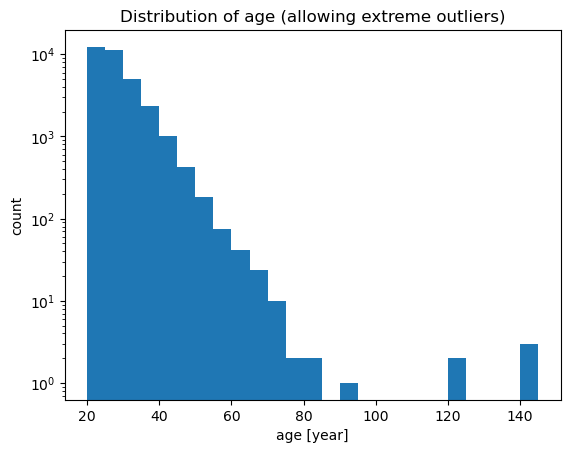

In [6]:
# distribution of age
plt.hist(df['person_age'], bins=np.linspace(20, 145, 26), log=True)
plt.title("Distribution of age (allowing extreme outliers)")
plt.xlabel("age [year]")
plt.ylabel("count")
plt.show()

In [7]:
# delete outliers and display shape
df.drop(df.loc[
    (df['person_age']>100) | (df['person_emp_length']>100)
].index, inplace=True)
print(df.shape)

(32574, 12)


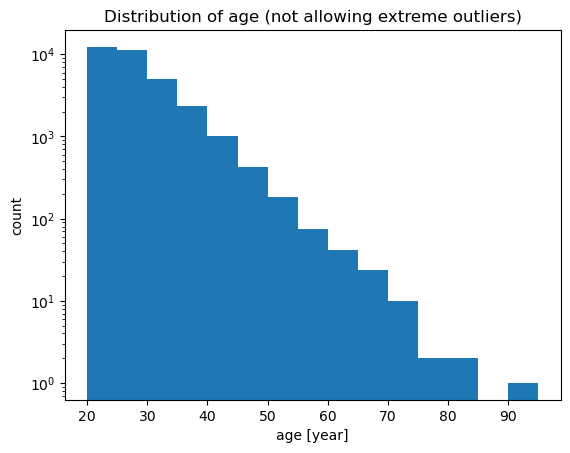

In [8]:
# distribution of age (after deleting outliers)
plt.hist(df['person_age'], bins=np.linspace(20, 95, 16), log=True)
plt.title("Distribution of age (not allowing extreme outliers)")
plt.xlabel("age [year]")
plt.ylabel("count")
plt.show()

In [9]:
# Distribution of classes
Y = df['loan_status']
X = df.loc[:, df.columns != 'loan_status']
print(f"Size of class 1 samples: {Y.sum()}")
print(f"Proportion of class 1 samples: {Y.mean()}")

Size of class 1 samples: 7107
Proportion of class 1 samples: 0.21818014367286792


In [10]:
# split by classes and display shapes
df_class_0 = df[Y==0]
df_class_1 = df[Y==1]
print(f"Shape of class 0 data: {df_class_0.shape}")
print(f"Shape of class 1 data: {df_class_1.shape}")

Shape of class 0 data: (25467, 12)
Shape of class 1 data: (7107, 12)


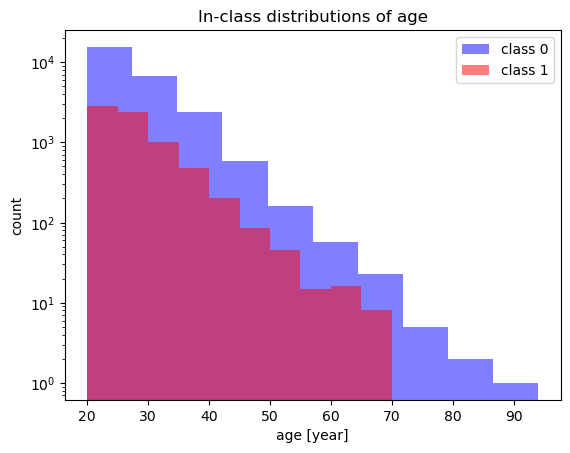

In [11]:
# in-class distributions of age
plt.hist(df_class_0['person_age'], log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['person_age'], log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of age')
plt.xlabel('age [year]')
plt.ylabel('count')
plt.legend()
plt.show()

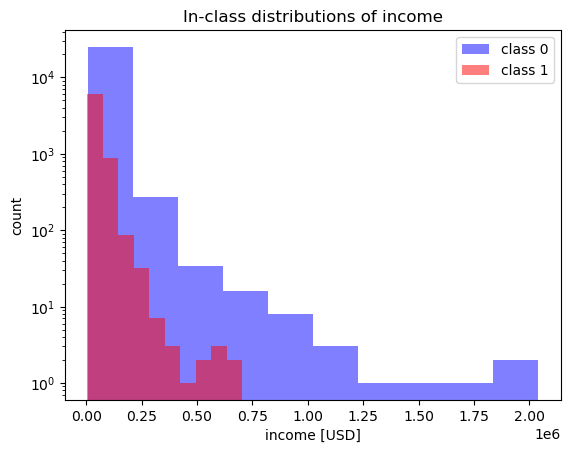

In [12]:
# in-class distributions of income
plt.hist(df_class_0['person_income'], log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['person_income'], log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of income')
plt.xlabel('income [USD]')
plt.ylabel('count')
plt.legend()
plt.show()

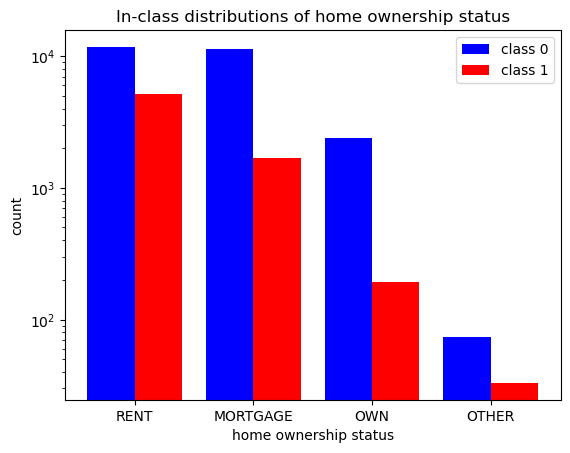

In [13]:
# in-class distributions of home ownership status
x = df['person_home_ownership'].value_counts().keys()
y0 = df_class_0['person_home_ownership'].value_counts().values
y1 = df_class_1['person_home_ownership'].value_counts().values
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y0, width=0.4, color='b', label='class 0', log=True)
plt.bar(x_axis+0.2, y1, width=0.4, color='r', label='class 1', log=True)
plt.xticks(x_axis, x)
plt.title('In-class distributions of home ownership status')
plt.xlabel('home ownership status')
plt.ylabel('count')
plt.legend()
plt.show()

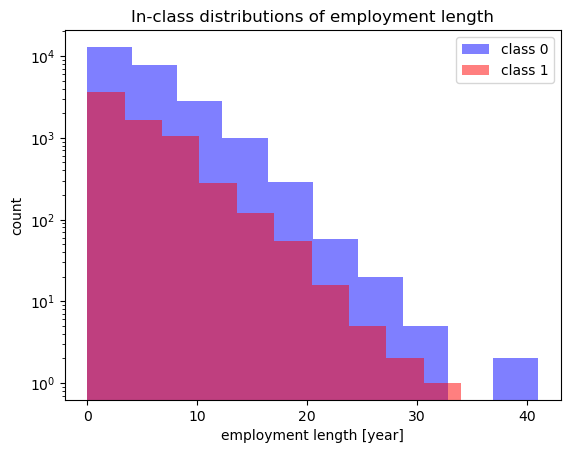

In [14]:
# in-class distributions of employment length
plt.hist(df_class_0['person_emp_length'], log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['person_emp_length'], log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of employment length')
plt.xlabel('employment length [year]')
plt.ylabel('count')
plt.legend()
plt.show()

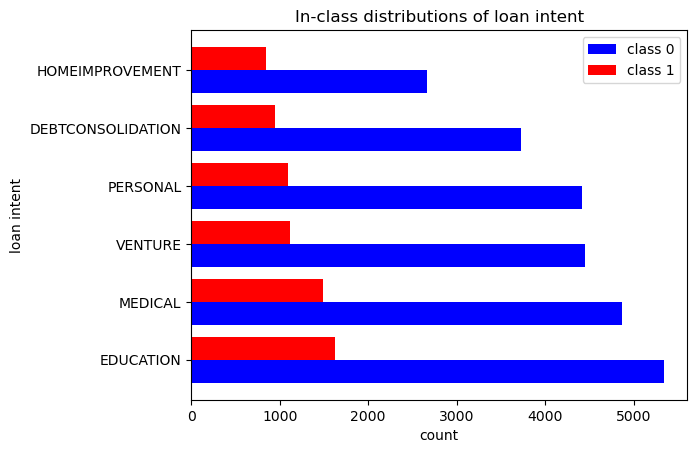

In [15]:
# in-class distributions of loan intent
y = df['loan_intent'].value_counts().keys()
x0 = df_class_0['loan_intent'].value_counts().values
x1 = df_class_1['loan_intent'].value_counts().values
y_axis = np.arange(len(y))
plt.barh(y_axis-0.2, x0, height=0.4, color='b', label='class 0')
plt.barh(y_axis+0.2, x1, height=0.4, color='r', label='class 1')
plt.yticks(y_axis, y)
plt.title('In-class distributions of loan intent')
plt.xlabel('count')
plt.ylabel('loan intent')
plt.legend()
plt.show()

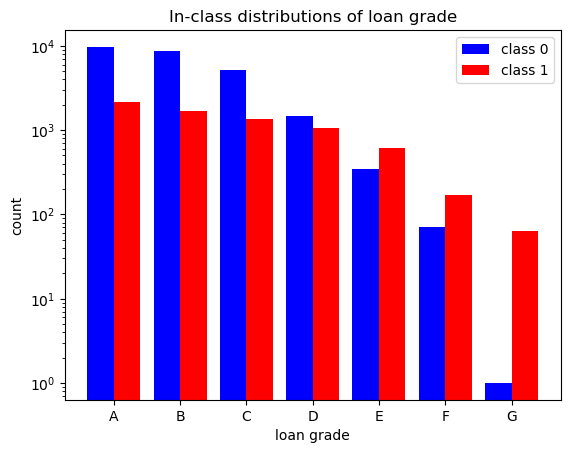

In [16]:
# in-class distributions of loan grade
x = df['loan_grade'].value_counts().keys()
y0 = df_class_0['loan_grade'].value_counts().values
y1 = df_class_1['loan_grade'].value_counts().values
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y0, width=0.4, color='b', label='class 0', log=True)
plt.bar(x_axis+0.2, y1, width=0.4, color='r', label='class 1', log=True)
plt.xticks(x_axis, x)
plt.title('In-class distributions of loan grade')
plt.xlabel('loan grade')
plt.ylabel('count')
plt.legend()
plt.show()

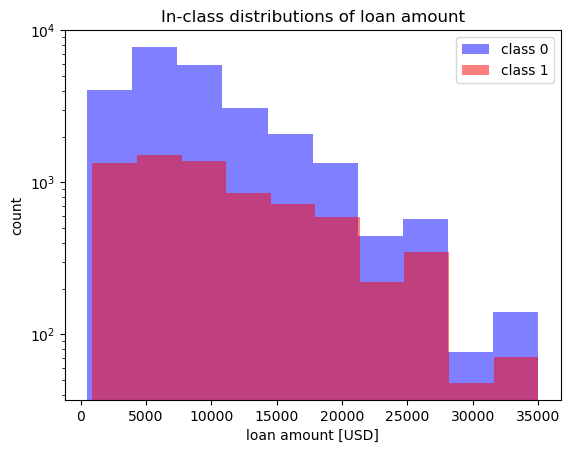

In [17]:
# in-class distributions of loan amount
plt.hist(df_class_0['loan_amnt'], log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['loan_amnt'], log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of loan amount')
plt.xlabel('loan amount [USD]')
plt.ylabel('count')
plt.legend()
plt.show()

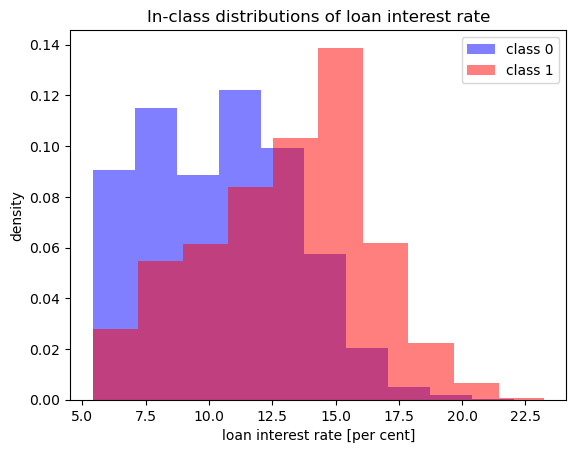

In [18]:
# in-class distributions of loan interest rate
plt.hist(df_class_0['loan_int_rate'], density=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['loan_int_rate'], density=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of loan interest rate')
plt.xlabel('loan interest rate [per cent]')
plt.ylabel('density')
plt.legend()
plt.show()

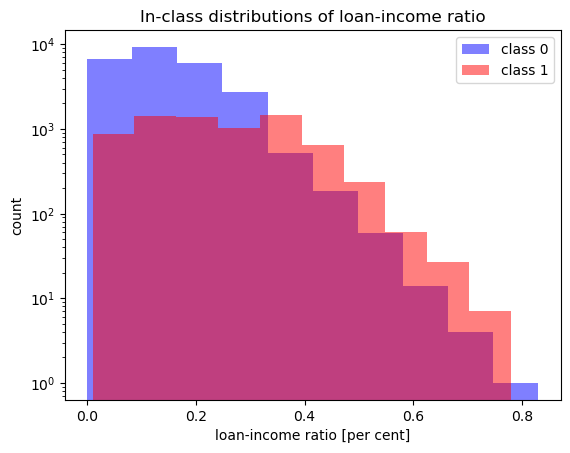

In [19]:
# in-class distributions of loan-income ratio
plt.hist(df_class_0['loan_percent_income'], log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['loan_percent_income'], log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of loan-income ratio')
plt.xlabel('loan-income ratio [per cent]')
plt.ylabel('count')
plt.legend()
plt.show()

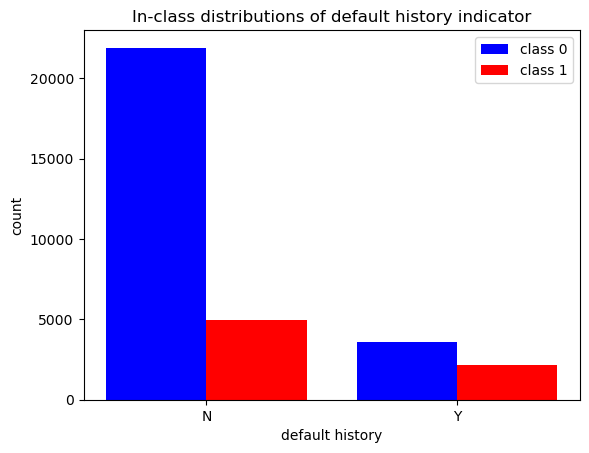

In [20]:
# in-class distributions of default history indicator
x = df['cb_person_default_on_file'].value_counts().keys()
y0 = df_class_0['cb_person_default_on_file'].value_counts().values
y1 = df_class_1['cb_person_default_on_file'].value_counts().values
x_axis = np.arange(len(x))
plt.bar(x_axis-0.2, y0, width=0.4, color='b', label='class 0', log=False)
plt.bar(x_axis+0.2, y1, width=0.4, color='r', label='class 1', log=False)
plt.xticks(x_axis, x)
plt.title('In-class distributions of default history indicator')
plt.xlabel('default history')
plt.ylabel('count')
plt.legend()
plt.show()

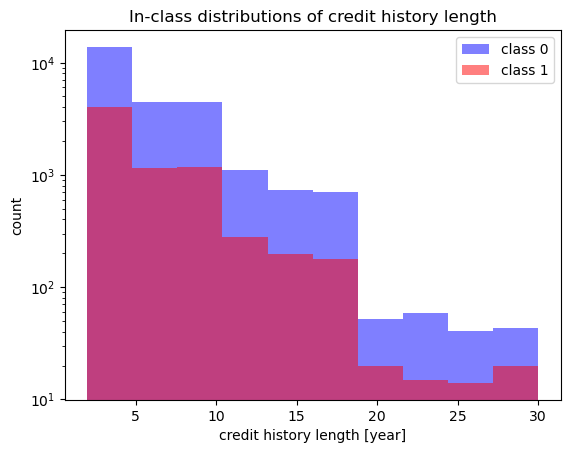

In [21]:
# in-class distributions of credit history length
plt.hist(df_class_0['cb_person_cred_hist_length'], log=True, color='b', label='class 0', alpha=0.5)
plt.hist(df_class_1['cb_person_cred_hist_length'], log=True, color='r', label='class 1', alpha=0.5)
plt.title('In-class distributions of credit history length')
plt.xlabel('credit history length [year]')
plt.ylabel('count')
plt.legend()
plt.show()

In [22]:
# proportion of missing value
df_with_nan = df[df.isna().any(axis=1)]
size_nan = len(df_with_nan)
prop_nan = len(df_with_nan) / len(df)
print(f"Number of samples with missing values: {size_nan}")
print(f"Proportion of samples with missing values: {prop_nan}")

Number of samples with missing values: 3942
Proportion of samples with missing values: 0.12101676183459201


In [23]:
# features with missing values
person_emp_length_with_nan = df[df['person_emp_length'].isna()]
loan_int_rate_with_nan = df[df['loan_int_rate'].isna()]
print(f"Number of missing values in employment length: {len(person_emp_length_with_nan)}")
print(f"Number of missing values in interest rate: {len(loan_int_rate_with_nan)}")

Number of missing values in employment length: 895
Number of missing values in interest rate: 3115


## Splitting

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

In [25]:
# feature engineering
X.loc[:, 'cb_person_default_on_file'] = X['cb_person_default_on_file'].replace({'Y': 1, 'N': 0})

/var/folders/zz/lsfr46lj681dz71k0f9cw6k00000gn/T/ipykernel_18147/3900455080.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, 'cb_person_default_on_file'] = X['cb_person_default_on_file'].replace({'Y': 1, 'N': 0})


In [26]:
# split and display shapes
STATE = 42
train_other_splitter = StratifiedShuffleSplit(n_splits=1, train_size=0.9, random_state=STATE)
for train_idx, other_idx in train_other_splitter.split(X, Y):
    X_train, Y_train = X.iloc[train_idx], Y.iloc[train_idx]
    X_other, Y_other = X.iloc[other_idx], Y.iloc[other_idx]
val_test_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=STATE)
for val_idx, test_idx in val_test_splitter.split(X_other, Y_other):
    X_val, Y_val = X_other.iloc[val_idx], Y_other.iloc[val_idx]
    X_test, Y_test = X_other.iloc[test_idx], Y_other.iloc[test_idx]
data_dict = {
    'X_train': X_train,
    'Y_train': Y_train,
    'X_val': X_val,
    'Y_val': Y_val,
    'X_test': X_test,
    'Y_test': Y_test,
}
for name, data in data_dict.items():
    print(f"{name}: {data.shape}")
    

X_train: (29316, 11)
Y_train: (29316,)
X_val: (1629, 11)
Y_val: (1629,)
X_test: (1629, 11)
Y_test: (1629,)


In [27]:
# check proportions
print(f"Proportion of class 1 in Y_train: {Y_train.mean()}")
print(f"Proportion of class 1 in Y_val: {Y_val.mean()}")
print(f"Proportion of class 1 in Y_test: {Y_test.mean()}")

Proportion of class 1 in Y_train: 0.21817437576749898
Proportion of class 1 in Y_val: 0.2185389809699202
Proportion of class 1 in Y_test: 0.21792510742786986


## Preprocessing

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [29]:
# preprocess and display shapes
standard_features = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]
onehot_features = [
    'person_home_ownership',
    'loan_intent',
]
binary_features = ['cb_person_default_on_file']
ordinal_features = ['loan_grade']
ordinal_categories = [['A', 'B', 'C', 'D', 'E', 'F', 'G']]
preprocessor = ColumnTransformer(transformers=[
    ('standard scaler', StandardScaler(), standard_features),
    ('one-hot encoder', OneHotEncoder(sparse_output=False), onehot_features),
    ('ordinal encoder', OrdinalEncoder(categories=ordinal_categories), ordinal_features),
    ('identity', 'passthrough', binary_features)
])
classifier = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = classifier.fit_transform(X_train)
X_val_prep = classifier.transform(X_val)
X_test_prep = classifier.transform(X_test)
preprocessed_data_dict = {
    'X_train_prep': X_train_prep,
    'X_val_prep': X_val_prep,
    'X_test_prep': X_test_prep
}
for name, data in preprocessed_data_dict.items():
    print(f"{name}: {data.shape}")

X_train_prep: (29316, 19)
X_val_prep: (1629, 19)
X_test_prep: (1629, 19)


In [30]:
# display features after preprocessing
print(preprocessor.get_feature_names_out())

['standard scaler__person_age' 'standard scaler__person_income'
 'standard scaler__person_emp_length' 'standard scaler__loan_amnt'
 'standard scaler__loan_int_rate' 'standard scaler__loan_percent_income'
 'standard scaler__cb_person_cred_hist_length'
 'one-hot encoder__person_home_ownership_MORTGAGE'
 'one-hot encoder__person_home_ownership_OTHER'
 'one-hot encoder__person_home_ownership_OWN'
 'one-hot encoder__person_home_ownership_RENT'
 'one-hot encoder__loan_intent_DEBTCONSOLIDATION'
 'one-hot encoder__loan_intent_EDUCATION'
 'one-hot encoder__loan_intent_HOMEIMPROVEMENT'
 'one-hot encoder__loan_intent_MEDICAL'
 'one-hot encoder__loan_intent_PERSONAL'
 'one-hot encoder__loan_intent_VENTURE' 'ordinal encoder__loan_grade'
 'identity__cb_person_default_on_file']
